<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/GNN%20Graph%20Spectral%20Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install networkx --quiet

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import warnings
warnings.filterwarnings('ignore')

In [2]:


"""
Graph Spectral Filtering for Graph Signal - Implementation based on KDD2021 Tutorial

This code demonstrates Graph Spectral Filtering as described in the tutorial.
Steps:
1. Create a graph with node features and edge weights.
2. Compute the Graph Laplacian.
3. Perform eigen-decomposition of the Laplacian (Graph Fourier Transform).
4. Define a filter in the spectral domain (e.g., low-pass filter).
5. Apply the filter to the graph signal.
6. Reconstruct the filtered signal (Inverse Graph Fourier Transform).
7. Visualize the original and filtered signals on the graph.
"""

# Step 1: Create a sample graph with node features and edge weights
print("Step 1: Creating a sample graph...")

# Create a graph (using a small connected graph for clear visualization)
G = nx.Graph()

# Add nodes with features (each node has a scalar feature for simplicity, but can be extended to vectors)
# Node features represent some signal on the graph (e.g., temperature, sensor readings, etc.)
node_features = {
    0: 10.0,  # Feature value for node 0
    1: 25.0,  # Feature value for node 1
    2: 5.0,   # Feature value for node 2
    3: 30.0,  # Feature value for node 3
    4: 15.0,  # Feature value for node 4
    5: 20.0   # Feature value for node 5
}

# Add nodes to the graph
for node_id, feature in node_features.items():
    G.add_node(node_id, feature=feature)

# Add weighted edges
# Edge weights represent the strength of connection (e.g., similarity, distance, etc.)
edges_with_weights = [
    (0, 1, 0.8),  # Edge between node 0 and 1 with weight 0.8
    (0, 2, 0.6),  # Edge between node 0 and 2 with weight 0.6
    (1, 3, 0.9),  # Edge between node 1 and 3 with weight 0.9
    (2, 3, 0.7),  # Edge between node 2 and 3 with weight 0.7
    (3, 4, 0.5),  # Edge between node 3 and 4 with weight 0.5
    (4, 5, 0.8),  # Edge between node 4 and 5 with weight 0.8
    (1, 5, 0.4)   # Edge between node 1 and 5 with weight 0.4
]

for u, v, weight in edges_with_weights:
    G.add_edge(u, v, weight=weight)

# Extract the graph signal (node features) as a vector
f = np.array([node_features[i] for i in range(len(node_features))])
print(f"Original graph signal (node features): {f}")

# Step 2: Compute the Graph Laplacian
print("\nStep 2: Computing Graph Laplacian...")

# Get the weighted adjacency matrix
A = nx.adjacency_matrix(G, weight='weight').toarray()
print("Weighted Adjacency Matrix A:")
print(A)

# Compute the Degree matrix D
D = np.diag(np.sum(A, axis=1))
print("\nDegree Matrix D:")
print(D)

# Compute the Laplacian matrix L = D - A
L = D - A
print("\nLaplacian Matrix L = D - A:")
print(L)

# Step 3: Eigen-decomposition of Laplacian (Graph Fourier Transform)
print("\nStep 3: Performing eigen-decomposition (Graph Fourier Transform)...")

# Compute eigenvalues and eigenvectors
# eigh is used for symmetric matrices (Laplacian is symmetric)
eigenvalues, eigenvectors = eigh(L)

# Sort eigenvalues and eigenvectors (eigh returns them sorted, but we ensure it)
idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print(f"Eigenvalues (frequencies): {eigenvalues}")
print("Eigenvectors (Fourier modes) shape:", eigenvectors.shape)

# Graph Fourier Transform: f_hat = U^T * f
# Where U is the matrix of eigenvectors (each column is a Fourier mode)
U = eigenvectors
f_hat = U.T @ f  # This is the Graph Fourier Transform

print(f"\nGraph Fourier Coefficients (f_hat): {f_hat}")

# Step 4: Define a Spectral Filter
print("\nStep 4: Defining a Spectral Filter...")

# Define a low-pass filter: attenuate high frequencies
# We will keep low frequencies (small eigenvalues) and suppress high frequencies.
# Filter function g(λ): for example, g(λ) = exp(-λ) or a simple threshold.

def low_pass_filter(eigenvals, cutoff_freq=2):
    """
    Simple low-pass filter: g(λ_i) = 1 if λ_i < cutoff_freq, else 0.
    This removes high-frequency components.
    """
    g_lambda = np.where(eigenvals < cutoff_freq, 1.0, 0.0)
    return g_lambda

# Define a smoother filter: exponential decay
def exp_low_pass_filter(eigenvals, tau=1.0):
    """
    Exponential low-pass filter: g(λ_i) = exp(-tau * λ_i)
    This smoothly attenuates higher frequencies.
    """
    g_lambda = np.exp(-tau * eigenvals)
    return g_lambda

# Choose a filter (uncomment the one you want to use)
# g_lambda = low_pass_filter(eigenvalues, cutoff_freq=1.5)
g_lambda = exp_low_pass_filter(eigenvalues, tau=0.5)

print(f"Spectral filter values g(λ): {g_lambda}")

# Step 5: Apply the filter in spectral domain
print("\nStep 5: Applying filter in spectral domain...")

# Modulate the Fourier coefficients: f_hat_filtered[i] = g(λ_i) * f_hat[i]
f_hat_filtered = g_lambda * f_hat
print(f"Filtered Fourier Coefficients: {f_hat_filtered}")

# Step 6: Inverse Graph Fourier Transform
print("\nStep 6: Reconstructing filtered signal (Inverse GFT)...")

# Inverse Graph Fourier Transform: f_filtered = U * f_hat_filtered
f_filtered = U @ f_hat_filtered

print(f"Original signal: {f}")
print(f"Filtered signal: {f_filtered}")



Step 1: Creating a sample graph...
Original graph signal (node features): [10. 25.  5. 30. 15. 20.]

Step 2: Computing Graph Laplacian...
Weighted Adjacency Matrix A:
[[0.  0.8 0.6 0.  0.  0. ]
 [0.8 0.  0.  0.9 0.  0.4]
 [0.6 0.  0.  0.7 0.  0. ]
 [0.  0.9 0.7 0.  0.5 0. ]
 [0.  0.  0.  0.5 0.  0.8]
 [0.  0.4 0.  0.  0.8 0. ]]

Degree Matrix D:
[[1.4 0.  0.  0.  0.  0. ]
 [0.  2.1 0.  0.  0.  0. ]
 [0.  0.  1.3 0.  0.  0. ]
 [0.  0.  0.  2.1 0.  0. ]
 [0.  0.  0.  0.  1.3 0. ]
 [0.  0.  0.  0.  0.  1.2]]

Laplacian Matrix L = D - A:
[[ 1.4 -0.8 -0.6  0.   0.   0. ]
 [-0.8  2.1  0.  -0.9  0.  -0.4]
 [-0.6  0.   1.3 -0.7  0.   0. ]
 [ 0.  -0.9 -0.7  2.1 -0.5  0. ]
 [ 0.   0.   0.  -0.5  1.3 -0.8]
 [ 0.  -0.4  0.   0.  -0.8  1.2]]

Step 3: Performing eigen-decomposition (Graph Fourier Transform)...
Eigenvalues (frequencies): [-4.45916836e-17  5.43367793e-01  1.47056905e+00  1.82448611e+00
  2.05695881e+00  3.50461824e+00]
Eigenvectors (Fourier modes) shape: (6, 6)

Graph Fourier Coeffici


Step 7: Visualizing results...


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

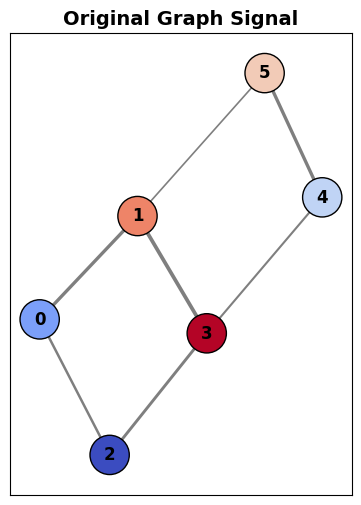

In [3]:
# Step 7: Visualize the graph and signals
print("\nStep 7: Visualizing results...")

# Create a layout for the graph
pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency

plt.figure(figsize=(15, 6))

# Plot 1: Original Graph Signal
plt.subplot(1, 3, 1)
plt.title("Original Graph Signal", fontsize=14, fontweight='bold')

# Draw the graph
nx.draw_networkx_edges(G, pos, alpha=0.5, width=[G[u][v]['weight'] * 3 for u, v in G.edges()])
nx.draw_networkx_nodes(G, pos, node_color=f, cmap='coolwarm', node_size=800, edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=f.min(), vmax=f.max()))
sm.set_array([])
plt.colorbar(sm, shrink=0.8, label='Signal Value')
plt.axis('off')

# Plot 2: Filtered Graph Signal
plt.subplot(1, 3, 2)
plt.title("Filtered Graph Signal (Low-Pass)", fontsize=14, fontweight='bold')

nx.draw_networkx_edges(G, pos, alpha=0.5, width=[G[u][v]['weight'] * 3 for u, v in G.edges()])
nx.draw_networkx_nodes(G, pos, node_color=f_filtered, cmap='coolwarm', node_size=800, edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Add colorbar
sm_filtered = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=f_filtered.min(), vmax=f_filtered.max()))
sm_filtered.set_array([])
plt.colorbar(sm_filtered, shrink=0.8, label='Signal Value')
plt.axis('off')

# Plot 3: Frequency Domain Analysis
plt.subplot(1, 3, 3)
plt.title("Frequency Domain Analysis", fontsize=14, fontweight='bold')

# Plot original Fourier coefficients
plt.plot(eigenvalues, np.abs(f_hat), 'o-', label='Original |f_hat|', linewidth=2, markersize=8)

# Plot filtered Fourier coefficients
plt.plot(eigenvalues, np.abs(f_hat_filtered), 's-', label='Filtered |f_hat|', linewidth=2, markersize=8)

# Plot the filter response
plt.plot(eigenvalues, g_lambda, '^-', label='Filter g(λ)', linewidth=2, markersize=8)

plt.xlabel('Frequency (Eigenvalue λ)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Use log scale to better see small values

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("SUMMARY OF GRAPH SPECTRAL FILTERING")
print("="*60)
print(f"Original signal: {f}")
print(f"Filtered signal: {f_filtered}")
print(f"Signal smoothness (Laplacian quadratic form) - Original: {f.T @ L @ f:.4f}")
print(f"Signal smoothness (Laplacian quadratic form) - Filtered: {f_filtered.T @ L @ f_filtered:.4f}")
print("Note: Lower value indicates smoother signal (less high-frequency content).")

# Additional analysis: Show how smoothness changed
original_smoothness = f.T @ L @ f
filtered_smoothness = f_filtered.T @ L @ f_filtered

print(f"\nThe filtered signal is {original_smoothness/filtered_smoothness:.2f}x smoother than the original signal.")

print("\nThis demonstrates Graph Spectral Filtering as described in the KDD2021 tutorial!")
print("The low-pass filter removed high-frequency components, resulting in a smoother signal.")